In [1]:
import Pkg

pkgs = [
"DataFrames",
"StatsBase",
"StatsPlots",
"uCSV",
"ProgressMeter",
"Distances",
"Clustering",
"Colors",
"MultivariateStats",
"Dates",
"CategoricalArrays",
"GLM",
"Statistics",
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end

import Mycelia

[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
base_dir = dirname(pwd())
data_directory = joinpath(base_dir, "data")
results_dir = mkpath(joinpath(base_dir, "results"))

"/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/results"

In [3]:
sample_directories = readdir(joinpath(data_directory, "samples"), join=true)

14-element Vector{String}:
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_FA"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_MO"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_PROB"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RA_PROB"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_1BRO"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_3BRO"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_FA"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_MAun"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_MGF"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_MO"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/RI_MaUn"
 "/oak/stanfor

In [4]:
kraken_dbs = filter(x -> isdir(x), readdir("$(homedir())/workspace/kraken", join=true))

3-element Vector{String}:
 "/home/cjprybol/workspace/kraken/k2_pluspfp_08gb_20231009"
 "/home/cjprybol/workspace/kraken/k2_pluspfp_16gb_20231009"
 "/home/cjprybol/workspace/kraken/k2_pluspfp_20231009"

In [5]:
# kraken_db = "/home/cjprybol/workspace/kraken/k2_pluspfp_20231009"
kraken_db = "k2_pluspfp_20231009"

"k2_pluspfp_20231009"

In [6]:
kraken_reports = String[]
for sample_directory in sample_directories
    trim_galore_directories = filter(x -> occursin(r"trimgalore$", x), readdir(sample_directory, join=true))
    for trim_galore_directory in trim_galore_directories
        # @show trim_galore_directory
        kraken_directories = filter(x -> occursin(r"kraken", x), readdir(trim_galore_directory, join=true))
        for kraken_directory in kraken_directories
            reports = filter(x -> occursin(r"kraken-report\.tsv$", x), readdir(kraken_directory, join=true))
            append!(kraken_reports, reports)
        end
    end
end
kraken_reports = filter(x -> occursin(kraken_db, x), kraken_reports)

51-element Vector{String}:
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_FA/LO_FA_CKDN230005699-1A_H3TLGDSX7_L1_trimgalore/LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped_kraken/LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_FA/LO_FA_CKDN230005699-1A_H5HNJDSX7_L2_trimgalore/LO_FA_CKDN230005699-1A_H5HNJDSX7_L2.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped_kraken/LO_FA_CKDN230005699-1A_H5HNJDSX7_L2.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv"
 "/oak/stanford/scg/lab_mpsnyder/cjprybol/Mycelia/projects/me-cfs/data/samples/LO_FA/LO_FA_CKDN230005699-1A_H5HVHDSX7_L1_trimgalore/LO_FA_CKDN230005699-1A_H5HVHDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped_krake

In [7]:
taxon_levels = Mycelia.list_ranks()

9-element Vector{String}:
 "top"
 "superkingdom"
 "kingdom"
 "phylum"
 "class"
 "order"
 "family"
 "genus"
 "species"

In [8]:
# i = 1
# i = 2
# i = 3
# i = 4
# i = 5
# i = 6
# i = 7
# i = 8
i = 9

(taxon_index, taxon_level) = collect(enumerate(taxon_levels))[i]
println("$(taxon_index) - $(taxon_level)")
rank_table = Mycelia.list_rank(taxon_level)

9 - species


Row,taxid,name
,Int64,String
1,46014,Plasmavirus L2
2,174676,unidentified Fusellovirus
3,244589,Sulfolobus spindle-shaped virus 1
4,244590,Sulfolobus spindle-shaped virus 2
5,459290,Sulfolobus spindle-shaped virus 4
6,459291,Sulfolobus spindle-shaped virus 5
7,693628,Sulfolobus spindle-shaped virus 7
8,2032563,Sulfolobus spindle-shaped virus 8
9,2032573,Sulfolobus spindle-shaped virus 9


In [9]:
# turn me into a function that accepts a rank table and a list of kraken reports as well as an output
rank_taxids = Set(rank_table[!, "taxid"])
cross_sample_taxon_report_table = DataFrames.DataFrame()
ProgressMeter.@showprogress for kraken_report in kraken_reports
    report_table = Mycelia.read_kraken_report(kraken_report)
    taxon_level_report = report_table[map(x -> x in rank_taxids, report_table[!, "ncbi_taxonid"]), :]
    taxon_level_report[!, "sample_identifier"] .= basename(kraken_report)
    append!(cross_sample_taxon_report_table, taxon_level_report)
end
cross_sample_taxon_report_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:25


Row,percentage_of_fragments_at_or_below_taxon,number_of_fragments_at_or_below_taxon,number_of_fragments_assigned_directly_to_taxon,rank,ncbi_taxonid,scientific_name,sample_identifier
,Float64,Int64,Int64,String,Int64,String,String
1,30.18,16102,16102,S,9606,Homo sapiens,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
2,0.01,5,0,S,1071379,Tetrapisispora blattae,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
3,0.0,0,0,S,113608,Tetrapisispora phaffii,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
4,0.0,2,2,S,28985,Kluyveromyces lactis,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
5,0.0,1,0,S,4911,Kluyveromyces marxianus,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
6,0.0,2,0,S,27288,Naumovozyma castellii,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
7,0.0,1,0,S,27289,Naumovozyma dairenensis,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
8,0.01,3,3,S,42260,Zygotorulaspora mrakii,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv
9,0.0,1,1,S,27291,Saccharomyces paradoxus,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv


In [17]:
# drop human reads
filtered_cross_sample_taxon_report = cross_sample_taxon_report_table[cross_sample_taxon_report_table[!, "ncbi_taxonid"] .!= 9606, :]

cross_sample_taxon_report_summary = filtered_cross_sample_taxon_report[!, 
    DataFrames.Not([
            "percentage_of_fragments_at_or_below_taxon",
            "number_of_fragments_assigned_directly_to_taxon",
            "rank"
        ])]
cross_sample_taxon_report_summary[!, "taxon"] = map(row -> string(row["ncbi_taxonid"]) * "_" * row["scientific_name"], DataFrames.eachrow(cross_sample_taxon_report_summary))
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[!, DataFrames.Not([
            "ncbi_taxonid",
            "scientific_name"
        ])]

# assert sortedness & uniqueness (should be a no-op)
cross_sample_taxon_report_summary[!, "participant"] = map(x -> join(split(x, '_')[1:2], "_"), cross_sample_taxon_report_summary[!, "sample_identifier"])
unique!(DataFrames.sort!(cross_sample_taxon_report_summary, ["sample_identifier", "taxon"]))

# KEEP FILTERS
# cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[map(x -> occursin(r"^LO_", string(x)), cross_sample_taxon_report_summary[!, "participant"]), :]
# cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[map(x -> occursin(r"^RI_", string(x)), cross_sample_taxon_report_summary[!, "participant"]), :]

# EXCLUDE FILTERS
# remove RA_PROB - all
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[map(x -> !occursin(r"^RA_PROB", string(x)), cross_sample_taxon_report_summary[!, "participant"]), :]

# remove second RI_3BRO_L2, not first
# filter(x -> occursin(r"\^RI_3BRO", x), sort(unique(cross_sample_taxon_report_summary[!, "sample_identifier"])))
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[map(x -> !occursin("RI_3BRO_CKDN230005692-1A_H5HYWDSX7_L2", string(x)), cross_sample_taxon_report_summary[!, "sample_identifier"]), :]

# remove RI_MGF
cross_sample_taxon_report_summary = cross_sample_taxon_report_summary[map(x -> !occursin(r"^RI_MGF", string(x)), cross_sample_taxon_report_summary[!, "participant"]), :]

Row,number_of_fragments_at_or_below_taxon,sample_identifier,taxon,participant
,Int64,String,String,String
1,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1000373_Rosellinia necatrix quadrivirus 1,LO_FA
2,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1001341_Vernonia yellow vein Fujian virus,LO_FA
3,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,100177_Borreliella lusitaniae,LO_FA
4,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,100217_Epizootic haematopoietic necrosis virus,LO_FA
5,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,100225_Austwickia chelonae,LO_FA
6,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1002672_Candidatus Pelagibacter sp. IMCC9063,LO_FA
7,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1002681_Sida golden mosaic Lara virus,LO_FA
8,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1002689_Occallatibacter riparius,LO_FA
9,0,LO_FA_CKDN230005699-1A_H3TLGDSX7_L1.GCF_000001405.40_GRCh38.p14_genomic.fna.sorted.bam.unmapped.k2_pluspfp_20231009.kraken-report.tsv,1002724_Tunavirus Shfl1,LO_FA


In [ ]:
# cross_sample_taxon_report_summary_summary = DataFrames.combine(
#     DataFrames.groupby(cross_sample_taxon_report_summary[!, DataFrames.Not("sample_identifier")], ["participant", "taxon"]),
#     "number_of_fragments_at_or_below_taxon" => sum)

# cross_sample_taxon_report_summary_summary[!, "participant"] = CategoricalArrays.categorical(cross_sample_taxon_report_summary_summary[!, "participant"])

# cross_sample_taxon_report_summary_summary[!, "taxon"] = CategoricalArrays.categorical(cross_sample_taxon_report_summary_summary[!, "taxon"])

# cross_sample_taxon_report_summary_summary

# always_missing_taxa = Set([])
# for g in DataFrames.groupby(cross_sample_taxon_report_summary_summary, "taxon")
#     if sum(g[!, "number_of_fragments_at_or_below_taxon_sum"]) == 0
#         push!(always_missing_taxa, g[1, "taxon"])
#     end
# end
# always_missing_taxa

# cross_sample_taxon_report_summary_summary = cross_sample_taxon_report_summary_summary[map(x -> !(x in always_missing_taxa), cross_sample_taxon_report_summary_summary[!, "taxon"]), :]

In [ ]:
# cross_sample_taxon_report_summary_summary = cross_sample_taxon_report_summary_summary[map(x -> occursin(r"^LO_", string(x)), cross_sample_taxon_report_summary_summary[!, "participant"]), :]
# cross_sample_taxon_report_summary_summary = cross_sample_taxon_report_summary_summary[map(x -> occursin(r"^RI_", string(x)), cross_sample_taxon_report_summary_summary[!, "participant"]), :]

In [ ]:
# sample_mask = map(x -> !occursin(r"^RA_PROB", x) && !occursin(r"^RI_MGF", x) && !occursin(r"^RI_3BRO_CKDN230005692-1A_H5HYWDSX7_L2", x), samples)
# filtered_values = values[sample_mask, :]
# filtered_samples = samples[sample_mask]
# normalized_values = filtered_values ./ sum(filtered_values, dims=2)

In [ ]:
# model = GLM.lm(GLM.@formula(number_of_fragments_at_or_below_taxon_sum ~ participant + taxon), cross_sample_taxon_report_summary_summary)
# coeftable = GLM.coeftable(model)

In [ ]:
# coeftable[!, coeftable.pvalcol]

In [ ]:
# model = GLM.lm(GLM.@formula(number_of_fragments_at_or_below_taxon_sum ~ participant + taxon), cross_sample_taxon_report_summary_summary)
# coeftable = GLM.coeftable(model)

In [ ]:
# pvalues = coeftable.cols[coeftable.pvalcol]
# pvalue_ordering = sortperm(pvalues)
# ordered_features = coeftable.rownms[pvalue_ordering]
# ordered_pvalues = pvalues[pvalue_ordering]
# ordered_pvalues .*= length(ordered_pvalues)

In [ ]:
# is_signficant = ordered_pvalues .<= 0.001

In [ ]:
# ordered_features = ordered_features[is_signficant]
# ordered_pvalues = ordered_pvalues[is_signficant]

In [ ]:
# uCSV.write(
#     joinpath(results_dir, "significance_table.tsv"),
#     DataFrames.DataFrame(
#     feature = ordered_features,
#     pvalue = ordered_pvalues),
#     delim='\t')

In [ ]:
# model

In [ ]:
# filtered_cross_sample_taxon_report

In [18]:
# taxa = String[]
# samples = String[]
# n_samples = length(unique(cross_sample_taxon_report_summary[!, "sample_identifier"]))
# n_taxa = length(unique(cross_sample_taxon_report_summary[!, "taxon"]))
# values = zeros(n_samples, n_taxa)

taxa = sort(unique(cross_sample_taxon_report_summary[!, "taxon"]))
samples = sort(unique(cross_sample_taxon_report_summary[!, "sample_identifier"]))
values = zeros(length(samples), length(taxa))
ProgressMeter.@showprogress for (column_index, taxon_table) in enumerate(DataFrames.groupby(cross_sample_taxon_report_summary, "taxon"))
    taxon = taxon_table[1, "taxon"]
    # push!(taxa, taxon)
    # @show taxon
    @assert taxa[column_index] == taxon
    for (row_index, sample_table) in enumerate(DataFrames.groupby(taxon_table, "sample_identifier"))
        @assert DataFrames.nrow(sample_table) == 1
        row = sample_table[1, :]
        sample = row["sample_identifier"]
        # if column_index == 1
        #     push!(samples, sample)
        # else
        @assert samples[row_index] == sample
        # end
        values[row_index, column_index] = row["number_of_fragments_at_or_below_taxon"]
    end
end
values

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


44×25152 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0   3.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0   8.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0   3.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  15.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   2.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0   3.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   2.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   1.0
 ⋮          

In [19]:
# sort taxa so largest single sample taxa is first
taxa_frequency_ordering = sortperm(maximum.(eachcol(values)))
values = values[:, taxa_frequency_ordering]
taxa = taxa[taxa_frequency_ordering]
# find taxa that have no representation, and filter them out
taxa_is_detected = [sum(col) > 0 for col in eachcol(values)]
values = values[:, taxa_is_detected]
taxa = taxa[taxa_is_detected]
samples = string.(first.(split.(samples, '.')))
normalized_values = values ./ sum(values, dims=2)

44×4916 Matrix{Float64}:
 0.0          0.0         0.0         …  0.018825   0.0400505  0.0640556
 0.0          0.0         0.0            0.0108617  0.0311369  0.0485156
 0.0          0.0         0.0            0.0331126  0.0397351  0.0569536
 0.0          0.0         0.0            0.03       0.035      0.05
 0.000172176  0.0         0.0            0.0213499  0.0385675  0.0628444
 0.0          0.0         0.0         …  0.0188917  0.0443955  0.0582494
 0.0          0.0         0.0            0.0218228  0.0397946  0.0667522
 0.0          0.0         0.0            0.0186199  0.0295728  0.0558598
 0.0          0.0         0.0            0.0224898  0.0397204  0.063179
 0.0          0.0         0.0            0.0158416  0.0633663  0.0594059
 0.000165837  0.0         0.0         …  0.0227197  0.0399668  0.0691542
 0.0          0.0         0.0            0.0206553  0.0434473  0.0598291
 0.0          0.0         0.0            0.0139104  0.0278207  0.057187
 ⋮                               

In [32]:
for x in reverse(taxa)[1:10]
    println(x)
end

3369_Cryptomeria japonica
4072_Capsicum annuum
3888_Pisum sativum
4236_Lactuca sativa
3911_Vicia villosa
4232_Helianthus annuus
61646_Lelliottia amnigena
3469_Papaver somniferum
161934_Beta vulgaris
94328_Zingiber officinale


In [ ]:
for (sample, row) in zip(samples, eachrow(values))
    @show sample, taxa[last(findmax(row))]
end

In [ ]:
fit_pca = MultivariateStats.fit(MultivariateStats.PCA, normalized_values')

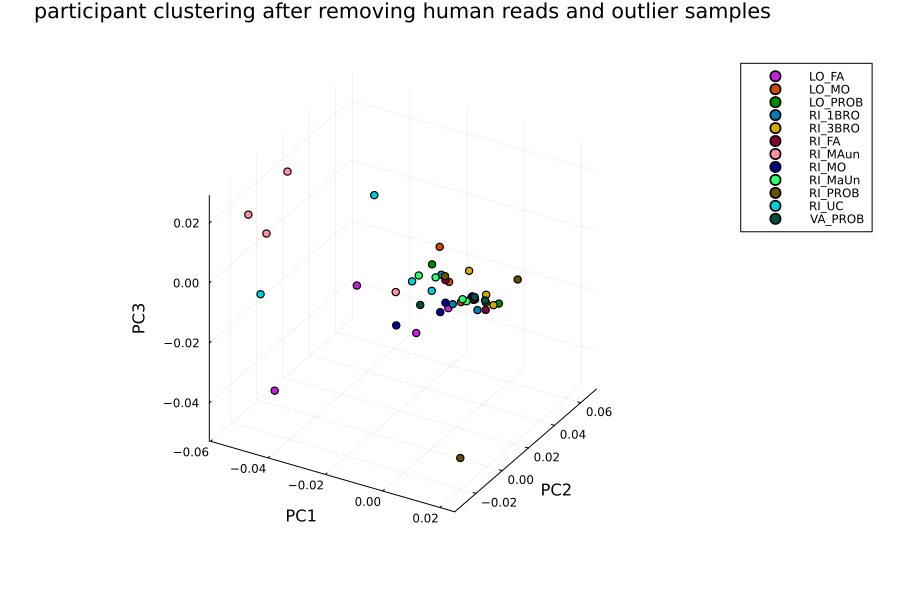

In [23]:

transformed_observations = MultivariateStats.transform(fit_pca, normalized_values')
top_level_groups = unique(map(x -> join(split(x, '_')[1:2], '_'), samples))
colorscheme = Colors.distinguishable_colors(length(top_level_groups), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)
xs = [Float64[] for group in top_level_groups]
ys = [Float64[] for group in top_level_groups]
zs = [Float64[] for group in top_level_groups]

raw_xs = transformed_observations[1, :]
if size(transformed_observations, 1) >= 2
    raw_ys = transformed_observations[2, :]
else
    raw_ys = zeros(length(raw_xs))
end

if size(transformed_observations, 1) >= 3
    raw_zs = transformed_observations[3, :]
else
    raw_zs = zeros(length(raw_xs))
end

for (sample, x, y, z) in zip(samples, raw_xs, raw_ys, raw_zs)
    # @show sample, x, y
    sample_groups = findall(x -> occursin(x, sample), top_level_groups)
    @assert length(sample_groups) == 1
    sample_group = first(sample_groups)
    push!(xs[sample_group], x)
    push!(ys[sample_group], y)
    push!(zs[sample_group], z)
end

plot = 
StatsPlots.scatter(
    xs,
    ys,
    zs,
    xlabel = "PC1",
    ylabel = "PC2",
    zlabel = "PC3",
    labels = hcat(top_level_groups...),
    title = "participant clustering after removing human reads and outlier samples",
    legend = :outertopright,
    margins = 20StatsPlots.px,
    seriescolor = hcat(colorscheme...),
    dpi=300,
    size=(900, 600)
)

display(plot)
for extension in [".png"]
    file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).outliers-removed.pca") * extension
    StatsPlots.savefig(plot, file)
end

In [33]:
transformed_observations

35×44 Matrix{Float64}:
  0.00731052   -0.0207694     0.00156557   …   0.0180923     0.00605388
 -0.00209465   -0.0104842    -0.0140481       -0.00558553   -0.0208341
 -0.00260916    0.000348053  -0.00797665       0.00537249    0.00518197
  0.00299698    0.011352      0.00833945       0.010347      0.0165806
 -0.00167628    0.00879461   -0.00434085      -0.0114029    -0.0142707
  0.000285749  -0.000625263  -0.00609447   …   0.0163384     0.0159547
 -0.00182273    0.00162608   -0.0129672        0.000766583   0.0252054
  0.000271179  -0.00786518    0.00267269       0.0115186     0.00462822
 -0.000637465   0.00378851   -0.00133866      -0.00615852    0.0262118
  0.00344327    0.00431985   -0.00629083      -0.0019255    -0.00482325
 -0.000728468   0.00432392   -0.00813523   …  -0.00208381    0.0159706
  0.00216907    0.0148465     0.014441         0.0242322    -0.00379867
 -0.000484721   0.00909171    0.0137156       -0.0130685    -0.00360875
  ⋮                                        ⋱    

In [38]:
distance_matrix = Mycelia.frequency_matrix_to_euclidean_distance_matrix(transformed_observations)

44×44 Matrix{Float64}:
 0.0        0.0436906  0.0396343  …  0.0180701   0.0436073  0.0554282
 0.0436906  0.0        0.0543535     0.0559723   0.0667087  0.0669291
 0.0396343  0.0543535  0.0           0.0470712   0.0595982  0.0680277
 0.0800302  0.0747487  0.0793659     0.090093    0.0952982  0.0900305
 0.0172839  0.053532   0.045201      0.015574    0.0471192  0.0572553
 0.0257674  0.0507286  0.046668   …  0.0268631   0.0519649  0.0592325
 0.0392615  0.0648383  0.0539707     0.0389481   0.0580618  0.0677475
 0.0373212  0.0534866  0.0560207     0.0398358   0.0588204  0.0641954
 0.0214611  0.0603744  0.0469352     0.00980311  0.0452581  0.0602585
 0.0468411  0.0642193  0.0617197     0.049068    0.062739   0.0700253
 0.0181694  0.0559923  0.0441936  …  0.0151119   0.0424136  0.0588726
 0.0297189  0.0531677  0.0485558     0.0320018   0.0509007  0.0603536
 0.0418829  0.0592685  0.0570874     0.0423716   0.0618208  0.0651226
 ⋮                                ⋱                         
 0.029

In [41]:
hclust_result = Clustering.hclust(distance_matrix, branchorder=:optimal)

Clustering.Hclust{Float64}([-9 -42; -34 1; … ; -4 41; 42 -40], [0.009803111634727761, 0.010150372464410513, 0.010559457062169668, 0.010701205844738541, 0.011069561390870777, 0.011663744757731995, 0.012872584415460738, 0.01564634310008441, 0.017498037011488395, 0.01919214065659872  …  0.049354717545930356, 0.05172381762164805, 0.05542821939765282, 0.0576916396040121, 0.05880552185402193, 0.06456539539011051, 0.06633480543105919, 0.0712620505908032, 0.07473867454298765, 0.07933054140479759], [4, 41, 37, 16, 36, 10, 43, 3, 35, 8  …  7, 13, 32, 2, 28, 44, 24, 23, 25, 40], :single)

In [44]:
samples

44-element Vector{String}:
 "LO_FA_CKDN230005699-1A_H3TLGDSX7_L1"
 "LO_FA_CKDN230005699-1A_H5HNJDSX7_L2"
 "LO_FA_CKDN230005699-1A_H5HVHDSX7_L1"
 "LO_FA_CKDN230005699-1A_H5HYWDSX7_L2"
 "LO_MO_CKDN230005698-1A_H3TLGDSX7_L1"
 "LO_MO_CKDN230005698-1A_H5HVHDSX7_L1"
 "LO_MO_CKDN230005698-1A_H5M5FDSX7_L2"
 "LO_MO_CKDN230005698-1A_H5MWHDSX7_L1"
 "LO_PROB_CKDN230005697-1A_H3TJYDSX7_L3"
 "LO_PROB_CKDN230005697-1A_H5HNJDSX7_L2"
 "RI_1BRO_CKDN230005691-1A_H3TJYDSX7_L1"
 "RI_1BRO_CKDN230005691-1A_H5HVHDSX7_L1"
 "RI_1BRO_CKDN230005691-1A_H5M5FDSX7_L2"
 ⋮
 "RI_MaUn_CKDN230005694-1A_H5MWHDSX7_L1"
 "RI_PROB_CKDN230005690-1A_H3TJYDSX7_L1"
 "RI_PROB_CKDN230005690-1A_H5HNJDSX7_L2"
 "RI_PROB_CKDN230005690-1A_H5HVHDSX7_L1"
 "RI_PROB_CKDN230005690-1A_H5HYWDSX7_L2"
 "RI_UC_CKDN230005693-1A_H3TJYDSX7_L2"
 "RI_UC_CKDN230005693-1A_H5HNJDSX7_L2"
 "RI_UC_CKDN230005693-1A_H5HVHDSX7_L1"
 "RI_UC_CKDN230005693-1A_H5HYWDSX7_L2"
 "VA_PROB_CKDN230005701-1A_H3TLGDSX7_L1"
 "VA_PROB_CKDN230005701-1A_H5HNJDSX7_L2"
 "VA_PROB_

44-element Vector{Int64}:
  4
 41
 37
 16
 36
 10
 43
  3
 35
  8
 20
 31
 33
  ⋮
 39
 17
  7
 13
 32
  2
 28
 44
 24
 23
 25
 40

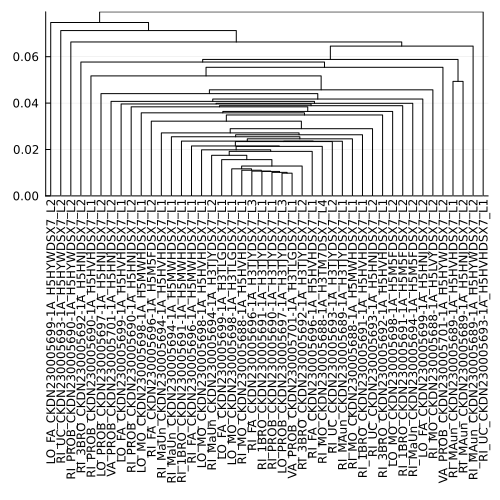

In [54]:
StatsPlots.plot(
    hclust_result,
    xticks=(1:length(samples), samples[hclust_result.order]),
    xrotation=90,
    size=(500, 500)
)

In [ ]:
# add sample heirarchical clustering back in 

In [24]:
# top_N = 50
# top_values = filtered_values[:, end-top_N+1:end]
# top_taxa = taxa[end-top_N+1:end]
# normalized_top_values = top_values ./ sum(top_values, dims=2)
# colorscheme = Colors.distinguishable_colors(length(top_taxa), [Colors.RGB(1,1,1), Colors.RGB(0,0,0)], dropseed=true)
# plot = StatsPlots.groupedbar(
#     normalized_top_values,
#     title = "read-classification - kraken - $(kraken_db) - $(taxon_level)",
#     xticks = (1:length(samples), samples),
#     xlims = (0, length(samples)+1),
#     xrotation=90,
#     ylabel = "proportion of reads",
#     labels = hcat(top_taxa...),
#     legend = :outertopright,
#     # labels=nothing,
#     # legend = false,
#     bar_position = :stack,
#     bar_width=0.7,
#     seriescolor = hcat(reverse(colorscheme)...),
#     size=(1920, 1080),
#     leftmargin=10StatsPlots.Plots.PlotMeasures.mm,
#     topmargin=5StatsPlots.Plots.PlotMeasures.mm,
#     bottommargin=maximum(length.(samples))StatsPlots.Plots.PlotMeasures.mm,
#     dpi=300
# )

LoadError: UndefVarError: filtered_values not defined

In [ ]:
# StatsPlots.savefig(plot, joinpath(results_dir, "kraken-no-human-reads.taxonomic-breakdowns.svg"))
# StatsPlots.savefig(plot, joinpath(results_dir, "kraken-no-human-reads.taxonomic-breakdowns.pdf"))
StatsPlots.savefig(plot, joinpath(results_dir, "kraken-no-human-reads.taxonomic-breakdowns.png"))

In [ ]:
# ################################################################################################
# distance_matrix = Distances.pairwise(Distances.Euclidean(), normalized_values, dims=1)
# clustering = Clustering.hclust(distance_matrix, branchorder=:optimal)
# cluster_plot = StatsPlots.plot(
#     clustering,
#     xlims = (0, length(samples)+1),
#     title = "read-classification - kraken - $(kraken_db) - $(taxon_level)",
#     titlefontsize = 12,
#     bottommargin = 0StatsPlots.Plots.PlotMeasures.px,
#     leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
#     rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
#     topmargin = (topmargin)StatsPlots.Plots.PlotMeasures.px,
#     xticks = false,
#     yticks = false,
#     yaxis = false,
#     xaxis = false
# )
# taxonomy_plot = StatsPlots.groupedbar(
#     normalized_values[clustering.order, :],
#     bar_position = :stack,
#     leftmargin = (leftmargin)StatsPlots.Plots.PlotMeasures.px,
#     topmargin = 0StatsPlots.Plots.PlotMeasures.px,
#     rightmargin = (rightmargin)StatsPlots.Plots.PlotMeasures.px,
#     bottommargin = (bottommargin)StatsPlots.Plots.PlotMeasures.px,
#     legendmargins = 0,
#     xticks = (1:length(samples), samples[clustering.order]),
#     xtickfontsize = 4,
#     xrotation=90,
#     xlims = (0, length(samples)+1),
#     size= (width, height),
#     ylabel = "proportion of reads",
#     seriescolor = hcat(reverse(colorscheme)...),
#     legend = false,
#     labels = hcat(taxa...),
#     legendfontsize = 6,
# )

# plot = StatsPlots.plot(
#     cluster_plot,
#     taxonomy_plot,
#     margins = 0StatsPlots.Plots.PlotMeasures.px,
#     layout=StatsPlots.grid(2,1, heights=[0.2,0.8])
# )
# # display(plot)
# # for extension in [".png", ".svg"]
# for extension in [".png"]
#     file = joinpath(results_dir, "taxonomic-breakdowns.kraken.$(kraken_db).$(taxon_index).$(taxon_level).normalized-reads.clustered") * extension
#     StatsPlots.savefig(plot, file)
# end